## Aprendendo Scikit Learn

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine 

X, y = load_wine(return_X_y=True)  

### Visualisação dos dados

In [9]:
# Carregar dados para um DataFrame
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Estatísticas básicas
print(df.describe())

# Distribuição das classes
print(df['target'].value_counts())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

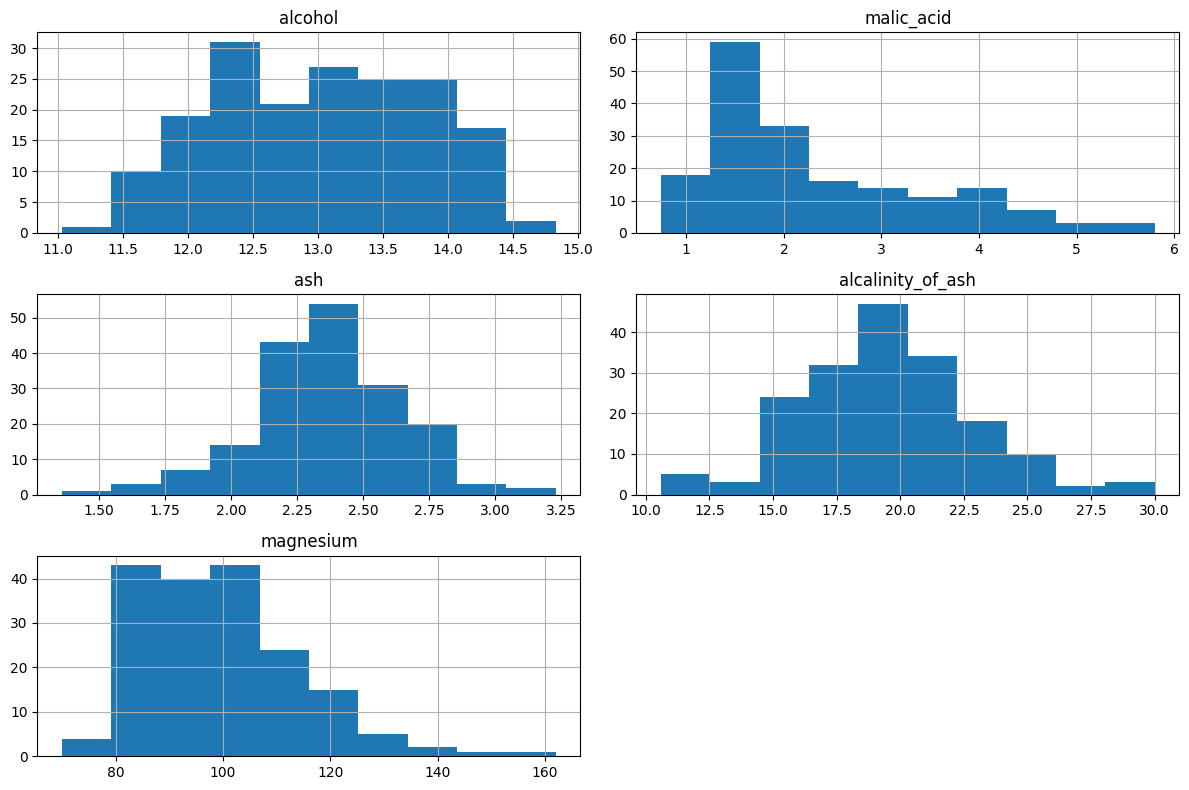

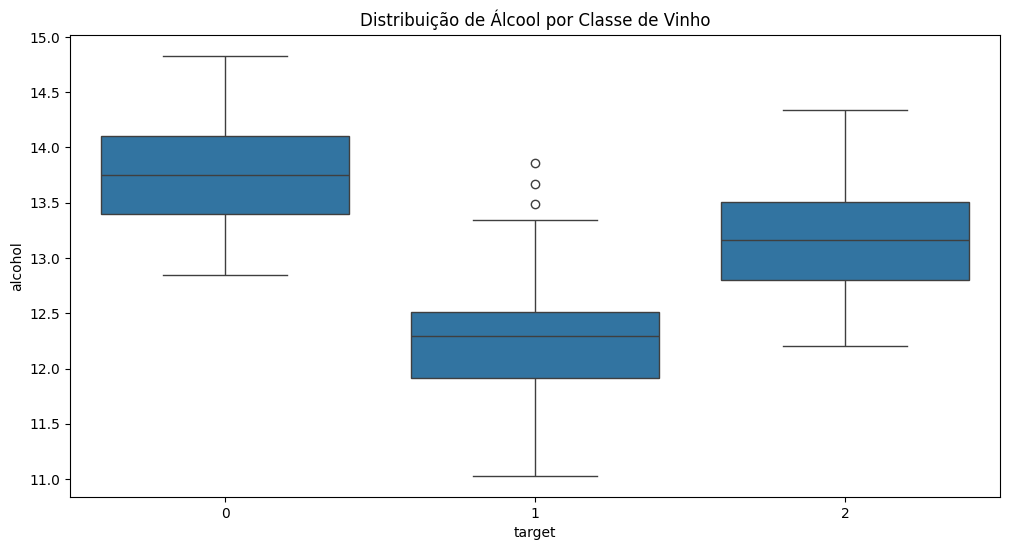

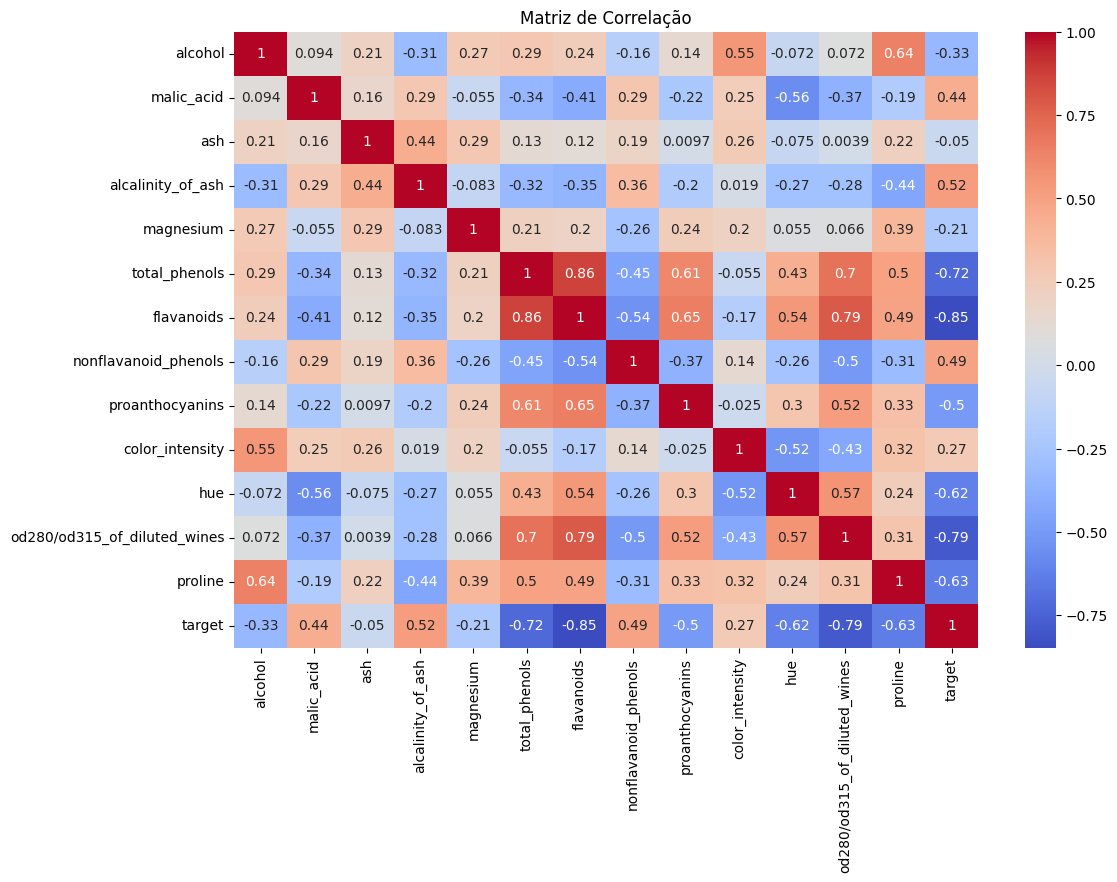

In [15]:
# Aqui eu estou fazendo Visualizações com Matplotlib e Seaborn

# Histograma das características
df[wine.feature_names[:5]].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplot por classe
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='alcohol', data=df)
plt.title('Distribuição de Álcool por Classe de Vinho')
plt.show()

# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### PCA para Redução de Dimensionalidade

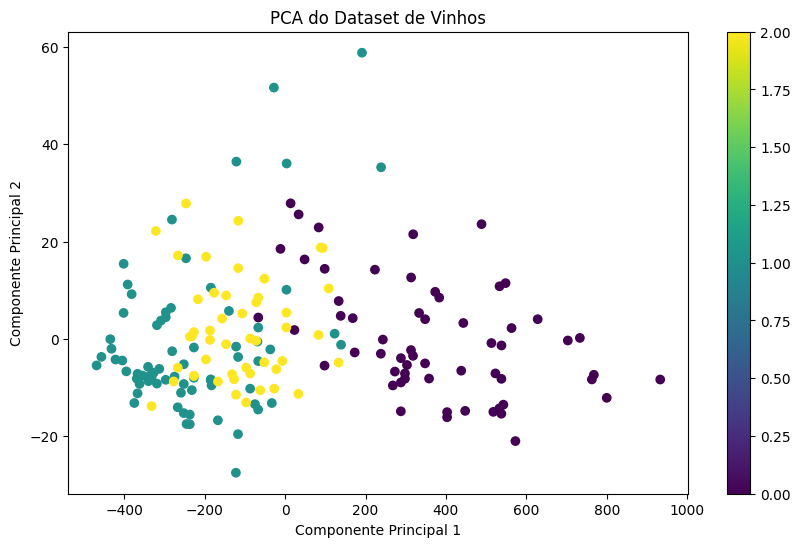

In [11]:
from sklearn.decomposition import PCA

# Reduzindo para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotando
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.title('PCA do Dataset de Vinhos')
plt.show()

### Modelos de Aprendizado de Máquina

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



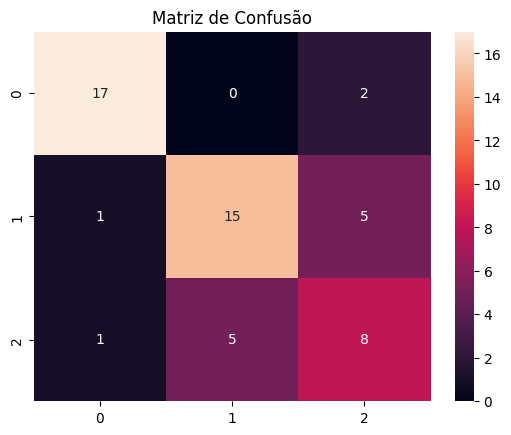

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo KNN para classificação
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.show()

In [13]:
#Regressão
from sklearn.ensemble import RandomForestRegressor

# Usando o teor alcoólico como target para regressão
X_reg = np.delete(X, 0, axis=1)  # removendo a coluna 'alcohol'
y_reg = X[:, 0]  # usando 'alcohol' como target

# Modelo de regressão
rf = RandomForestRegressor()
rf.fit(X_reg, y_reg)
y_pred = rf.predict(X_reg)

# Plotando resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_reg, y_pred)
plt.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Predição')
plt.title('Random Forest Regressor - Teor Alcoólico')
plt.show()

NameError: name 'np' is not defined

### Visualização de Decisões do Modelo

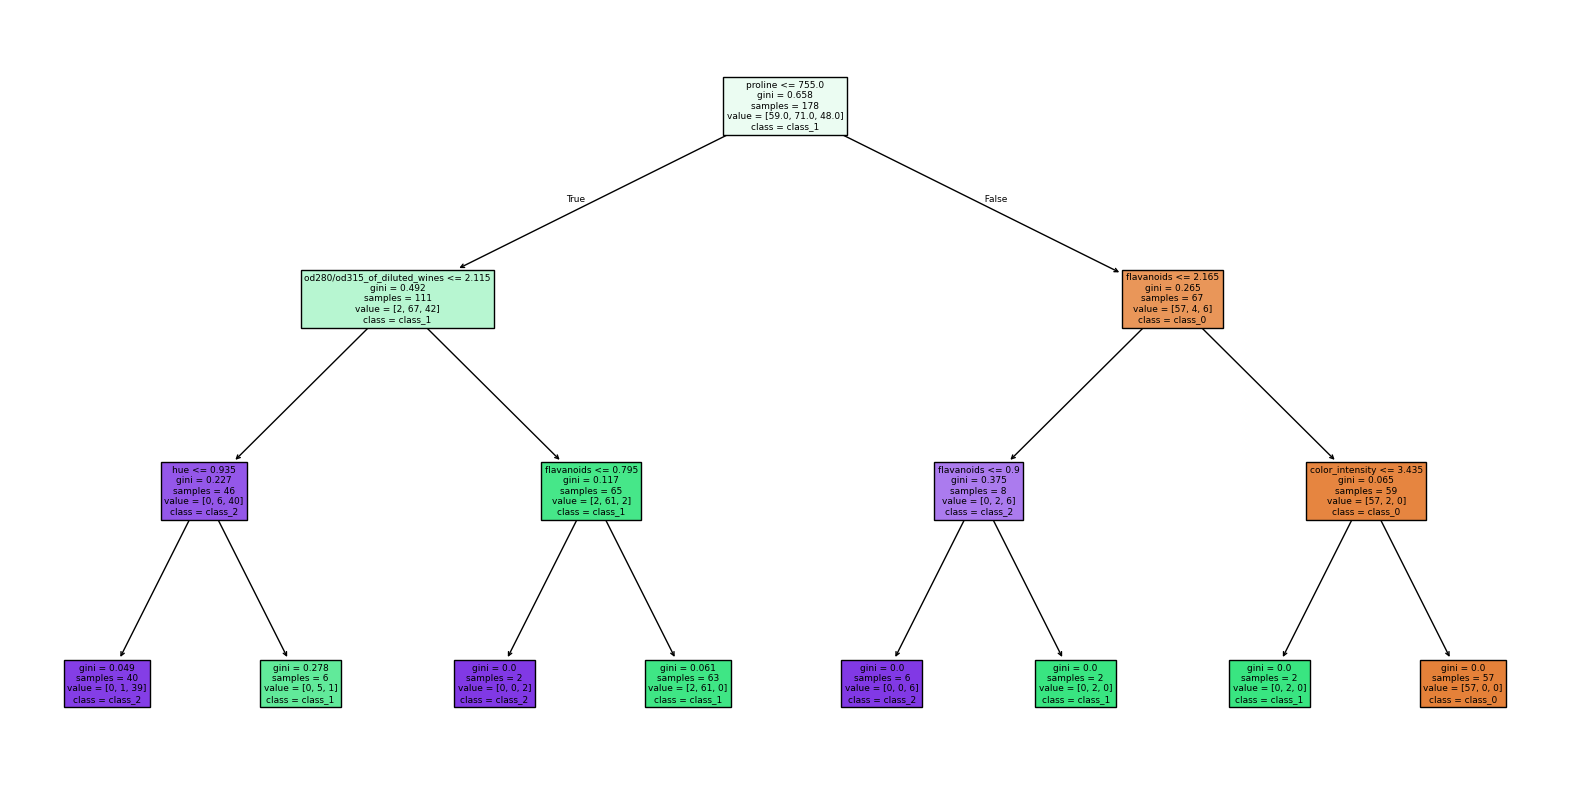

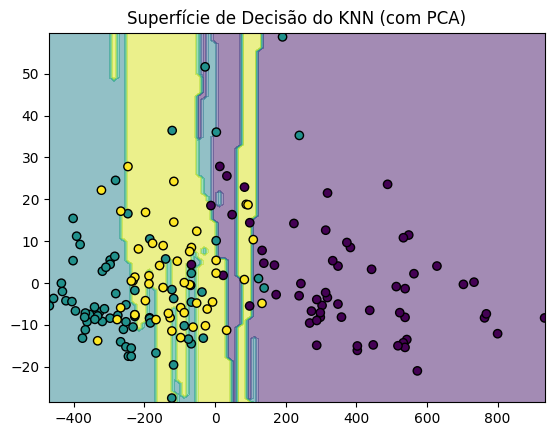

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Árvore com profundidade limitada para visualização
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

# Plotando a árvore
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()





# Reduzindo para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Treinar o modelo COM OS DADOS REDUZIDOS
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_pca, y)

# Agora o plot funcionará
disp = DecisionBoundaryDisplay.from_estimator(
    knn_pca, X_pca, response_method="predict",
    alpha=0.5, cmap='viridis'
)
disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k')
plt.title('Superfície de Decisão do KNN (com PCA)')
plt.show()

### Visualizando Predições do KNeighborsRegressor

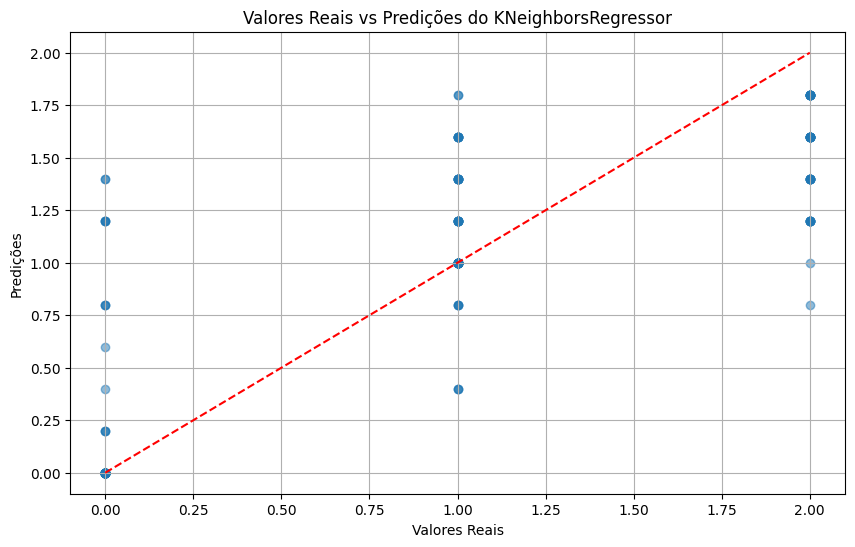

In [ ]:
 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

modelo = KNeighborsRegressor()
#modelo = LinearRegression()

modelo.fit(X, y)

KNeighborsRegressor()
#LinearRegression()

prev = modelo.predict(X)
#o número de predições que eu to fazendo é o mesmo número de dados no array X

plt.figure(figsize=(10, 6))
plt.scatter(y, prev, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Valores Reais vs Predições do KNeighborsRegressor')
plt.grid(True)
plt.show()

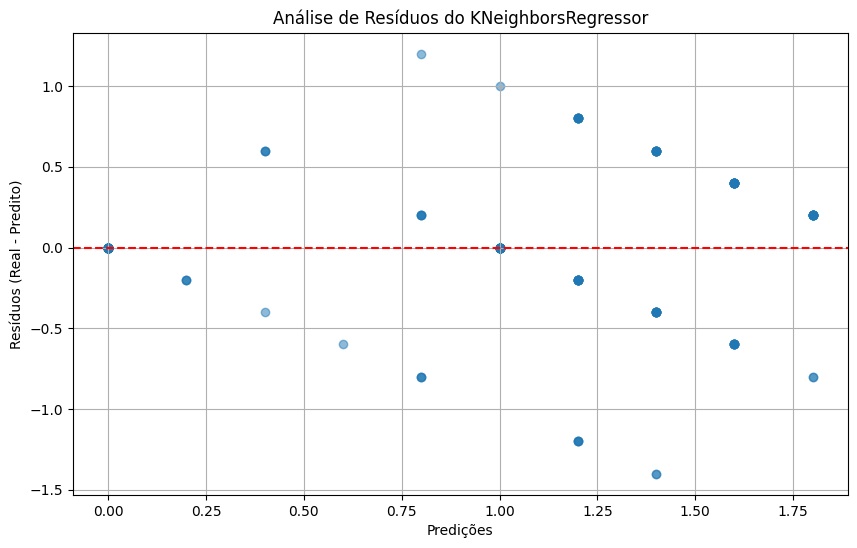

In [ ]:
residuos = y - prev

plt.figure(figsize=(10, 6))
plt.scatter(prev, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predições')
plt.ylabel('Resíduos (Real - Predito)')
plt.title('Análise de Resíduos do KNeighborsRegressor')
plt.grid(True)
plt.show()

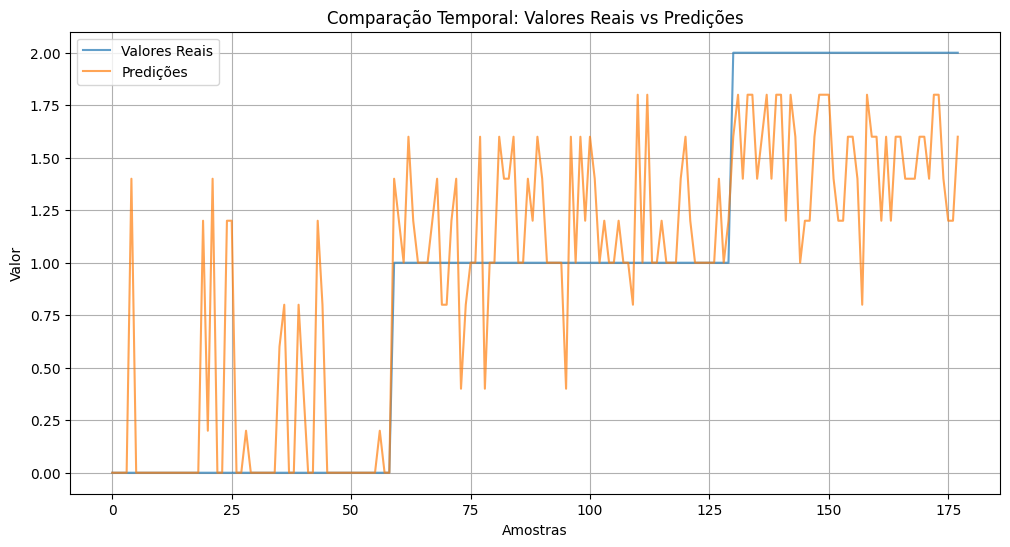

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Valores Reais', alpha=0.7)
plt.plot(prev, label='Predições', alpha=0.7)
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.title('Comparação Temporal: Valores Reais vs Predições')
plt.legend()
plt.grid(True)
plt.show()

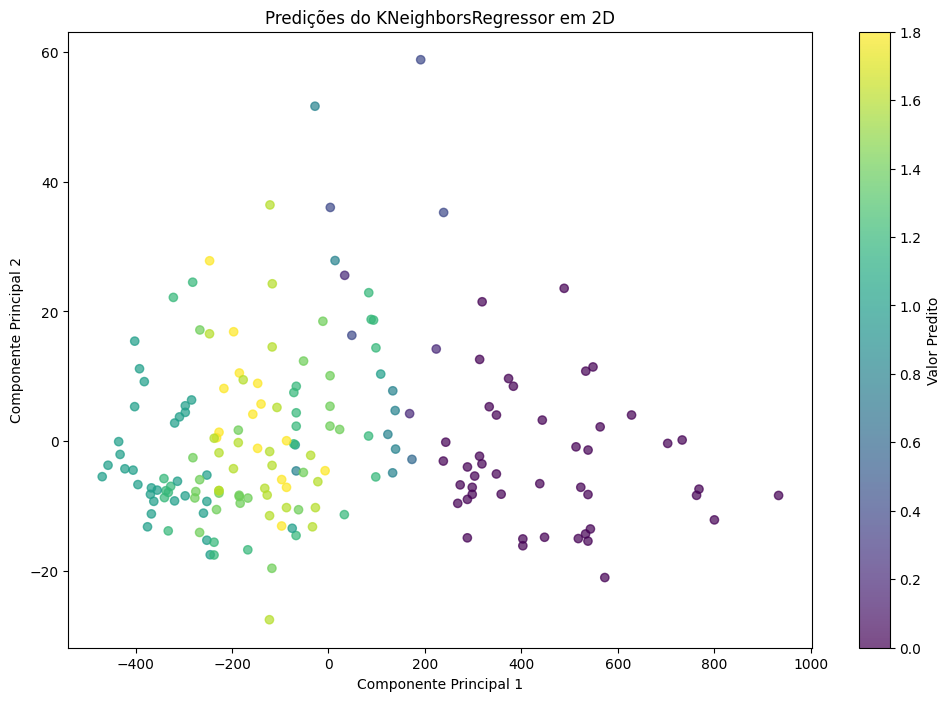

In [ ]:
from sklearn.decomposition import PCA

# Reduzindo para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=prev, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Valor Predito')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Predições do KNeighborsRegressor em 2D')
plt.show()